In [ ]:
# Using dataset of a 1978 survey conducted to measure likliehood of women to perform extramarital affairs
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

import statsmodels.api as sm
affairs_df = sm.datasets.fair.load_pandas().data
affairs_df.head()

In [83]:
# Create a categorical variable
affairs_df['affair_binary'] = (affairs_df['affairs'] > 0)

In [84]:
# find linear correlations between variables and affair_binary
affairs_df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair_binary,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


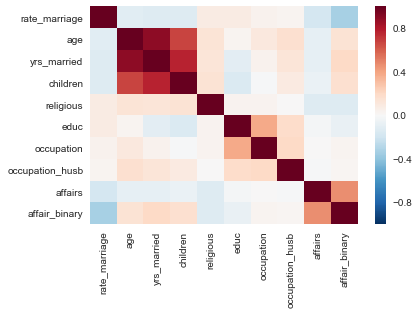

In [85]:
import seaborn as sns
%matplotlib inline
sns.heatmap(affairs_df.corr())

In [86]:
affairs_X = affairs_df.drop(['affairs', 'affair_binary'], axis=1)
# data without the affairs or affair_binary column
affairs_y = affairs_df['affair_binary']

In [87]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()    # instantiate the model

# import our cross validation module check the accuracy on the training set
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, affairs_X, affairs_y, cv=10)

print scores.mean(), "average accuracy"
print scores.std(), "standard deviation" 
# very low, meaning variance of the model is low

0.657556041876 average accuracy
0.0202213900543 standard deviation


In [88]:
import pandas as pd

# Explore individual features that make the biggest impact rate_marriage, yrs_married, and occupation_husb.
# But one of these variables doesn't quite make sense right?
# Its the occupation variable, because they are nominal, their interpretations
model.fit(affairs_X, affairs_y)
pd.DataFrame({'feature':affairs_X.columns, 'importance':model.feature_importances_}).sort('importance').tail(3)

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,importance
2,yrs_married,0.134713
0,rate_marriage,0.142761
7,occupation_husb,0.176047


In [89]:
# Dummy Variables:
# Encoding qualitiative (nominal) data using separate columns (see slides for linear regression for more)
occuptation_dummies = pd.get_dummies(affairs_df['occupation'],prefix='occ_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame(axis=0 means rows, axis=1 means columns)
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0


In [90]:
# Now for the husband's job
occuptation_dummies = pd.get_dummies(affairs_df['occupation_husb'], prefix='occ_husb_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame(axis=0 means rows, axis=1 means columns)
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.shape

(6366, 20)

In [91]:
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0,occ_husb__2.0,occ_husb__3.0,occ_husb__4.0,occ_husb__5.0,occ_husb__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0,0,0,1,0,0


In [92]:
# remove appropiate columns for feature set affairs_X = affairs_df.drop(['affairs', 'affair_binary',
# 'occupation', #'occupation_husb'], axis=1)
affairs_y = affairs_df['affair_binary']
model = DecisionTreeClassifier()

from sklearn.cross_validation import cross_val_score

# check the accuracy on the training set
scores = cross_val_score(model, affairs_X, affairs_y, cv=10)

print scores.mean(), "average accuracy"
print scores.std(), "standard deviation" # very low, meaning variance of the model is low

model.fit(affairs_X, affairs_y)
pd.DataFrame({'feature':affairs_X.columns, 'importance':model.feature_importances_}).sort('importance').tail(10)

0.656459356085 average accuracy
0.0151635870823 standard deviation


C:\Users\admin\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,importance
4,religious,0.092413
6,occupation,0.092843
1,age,0.107268
5,educ,0.123732
3,children,0.132679
2,yrs_married,0.133464
0,rate_marriage,0.140392
7,occupation_husb,0.177209
